# FORESEE Models: ALP coupling to SU(2)L 

## Load Libraries 

In [1]:
import sys, os
src_path = "../../"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt

/Users/abraham/Documents/GitHub/FORESEE/Models/ALP-W/../../src/foresee.py:1461: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


## 1. Specifying the Model

The phenomenology of the ALP coupling to SU(2)$_L$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = - \frac{1}{2} \color{red}{m_{a}}^2 a^2  - \frac{\color{red}{g_{aWW}}}{4}a W^a_{\mu\nu} \tilde W^a_{\mu\nu}
\end{equation}

with the ALP mass $m_a$ and the coupling parameter $g_{aWW}$ as free parameters. 

In [2]:
energy = "13.6"
modelname="ALP-W"
model = Model(modelname, path="./")

**Production** The ALP is mainly produced in FCNC kaon and B-meson decays. The branching fractions are (with $g = g_{aWW}\cdot GeV$)

\begin{equation}
    \text{BR}(K^+ \to \pi^+ a) = 10.5 \times g^2 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2}
\end{equation}
\begin{equation}
\text{BR}(K_L \to \pi^0 a) = 4.5 \times g^2 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2}
\end{equation}
\begin{equation}
\text{BR}(B \to X_s a)     = 2.3 \cdot 10^4 \times g^2 \times [(1-m_a^2/m_B^2)]^{2}
\end{equation}

In the following, we model light hadron production using `EPOSLHC`, `SIBYLL`, `QGSJET` and `Pythia8-Forward` and heavy hadron production using the `POWHEG+Pythia8` predicions.

In [3]:
%load_ext autoreload
%autoreload 2
from particle import Particle

def masses(pid,mass=0):
    pidabs = abs(int(pid))
    #Treat select entries separately
    if   pidabs==0: return mass
    elif pidabs==4: return 1.5   #GeV, scikit-particle returns 1.27 for c quark
    elif pidabs==5: return 4.5   #GeV, scikit-particle returns 4.18 for b quark  
    #General case: fetch values from scikit-particle
    else: 
        mret = Particle.from_pdgid(pidabs).mass   #MeV
        return mret*0.001 if mret!=None else 0.0  #GeV

In [24]:
pid=511
mass=0.1
mass1=masses(511)
mass2=masses(521)
mass3=masses(531)

print (mass1)
print (mass2)
print (mass3)

br1="2.3e4 * (1-(mass/mass1)**2)**2"
br2="2.3e4 * (1-(mass/mass2)**2)**2"
br3="2.3e4 * (1-(mass/mass3)**2)**2"

print (eval(br1))
print (eval(br2))
print (eval(br3))

5.27965
5.27934
5.36688
22983.500542789898
22983.49860540222
22984.03243598331


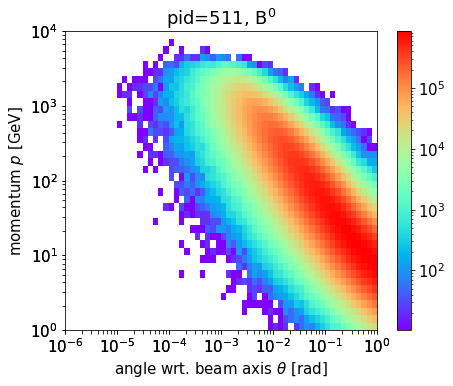

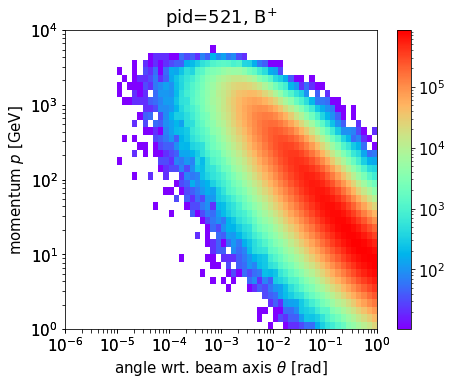

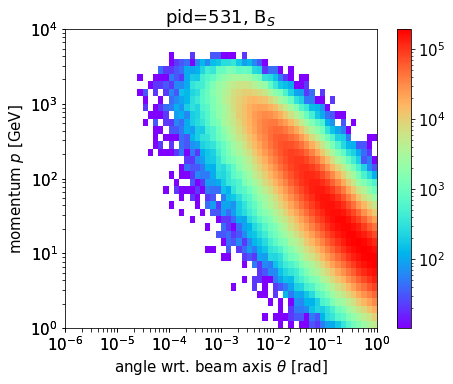

In [23]:
plot=foresee.get_spectrumplot(pid="511", generator="NLO-P8", energy="13.6")
plot.title(r'pid=511, B$^0$')
plot.show()

plot=foresee.get_spectrumplot(pid="521", generator="NLO-P8", energy="13.6")
plot.title(r'pid=521, B$^{+}$')
plot.show()

plot=foresee.get_spectrumplot(pid="531", generator="NLO-P8", energy="13.6")
plot.title(r'pid=531, B$_{S}$')
plot.show()

In [3]:
model.add_production_2bodydecay(
    pid0 = "130",
    pid1 = "111",
    br = "4.5 * coupling**2 * np.sqrt((1-(mass+self.masses('pid1'))**2/self.masses('pid0')**2)*(1-(mass-self.masses('pid1'))**2/self.masses('pid0')**2))",
    # generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    generator = ['Pythia8-Forward'],
    energy = energy,
    nsample = 100
)
model.add_production_2bodydecay(
    pid0 = "321",
    pid1 = "211",
    br = "10.5 * coupling**2 * np.sqrt((1-(mass+self.masses('pid1'))**2/self.masses('pid0')**2)*(1-(mass-self.masses('pid1'))**2/self.masses('pid0')**2))",
    # generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    generator = ['Pythia8-Forward'],
    energy = energy,
    nsample = 100, 
)
model.add_production_2bodydecay(
    pid0 = "-321",
    pid1 = "211",
    br = "10.5 * coupling**2 * np.sqrt((1-(mass+self.masses('pid1'))**2/self.masses('pid0')**2)*(1-(mass-self.masses('pid1'))**2/self.masses('pid0')**2))",
    # generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    generator = ['Pythia8-Forward'],
    energy = energy,
    nsample = 100, 
) 

In [4]:
model.add_production_2bodydecay(
    pid0 = "511",
    pid1 = "130",
    br = "2.3e4 * coupling**2 * (1-(mass/self.masses('pid0'))**2)**2",
    # generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    generator = ['NLO-P8'],
    energy = energy,
    nsample = 1000, 
) 

model.add_production_2bodydecay(
    pid0 = "-511",
    pid1 = "130",
    br = "2.3e4 * coupling**2 * (1-(mass/self.masses('pid0'))**2)**2",
    # generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    generator = ['NLO-P8'],
    energy = energy,
    nsample = 1000, 
) 

model.add_production_2bodydecay(
    pid0 = "521",
    pid1 = "321",
    br = "2.3e4 * coupling**2 * (1-(mass/self.masses('pid0'))**2)**2",
    # generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    generator = ['NLO-P8'],
    energy = energy,
    nsample = 1000, 
) 

model.add_production_2bodydecay(
    pid0 = "-521",
    pid1 = "-321",
    br = "2.3e4 * coupling**2 * (1-(mass/self.masses('pid0'))**2)**2",
    # generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    generator = ['NLO-P8'],
    energy = energy,
    nsample = 1000, 
) 

model.add_production_2bodydecay(
    pid0 = "531",
    pid1 = "333",
    br = "2.3e4 * coupling**2 * (1-(mass/self.masses('pid0'))**2)**2",
    # generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    generator = ['NLO-P8'],
    energy = energy,
    nsample = 100, 
) 

model.add_production_2bodydecay(
    pid0 = "-531",
    pid1 = "333",
    br = "2.3e4 * coupling**2 * (1-(mass/self.masses('pid0'))**2)**2",
    # generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    generator = ['NLO-P8'],
    energy = energy,
    nsample = 100, 
)  

**Decay:** The ALP mainly decays to pairs of photons. 

In [4]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
)

decay_modes = ["gamma_gamma", "e_e_gamma"] 
model.set_br_1d(
    modes = decay_modes,
    finalstates=[[22,22], [11,-11,22]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [5]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{a}=150$ MeV and $g= 10^{-4}$ and export events as a HEPMC file. 

In [6]:
mass, coupling, = 0.15, 1e-4

First, we will produce the corresponding flux for this mass and a reference coupling $\epsilon_{ref}=1$. 

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8_m_0.15.npy


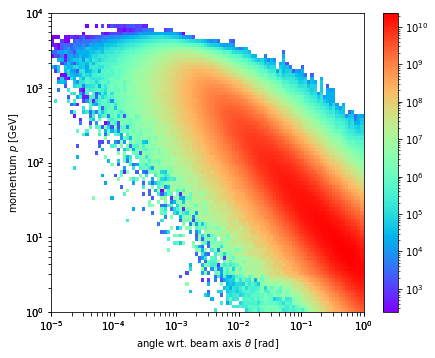

In [7]:
plot=foresee.get_llp_spectrum(mass=mass, coupling=1, do_plot=True)
plot.savefig("Spectrum_"+modelname+".pdf")
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER during 2022/2023. 

In [8]:
foresee.set_detector(
    distance=474, 
    selection="np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 
    length=4.0, 
    luminosity=57.7, 
)

# foresee_shifted.set_detector(
#     distance=474, 
#     selection="np.sqrt(x.x**2 + (x.y+0.0775)**2)<.1", 
#     length=4.0, 
#     luminosity=57.7, 
# )

In [9]:
mass_list = [0.1 , 0.3]

for mass in mass_list: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8_m_0.3.npy


In [11]:
mass_list = [0.1 , 0.1 , 0.3]
coupling_list=[
    [6e-4],
    [6e-5],
    [3e-5]
]

for mass, coupling in zip(mass_list, coupling_list):
    # print (mass)
    # print (coupling)
    output = foresee.get_events(mass=mass, energy=energy, couplings=coupling, preselectioncuts = "th<0.01 and p>1500")
    coups, ctaus, nsigs, momenta, weights = output

    output = foresee_shifted.get_events(mass=mass, energy=energy, couplings=coupling, preselectioncuts = "th<0.01 and p>1500")
    coups, ctaus, nsigs_shifted, momenta, weights = output
    
    for coup,ctau,nsig,nsig_shifted in zip(coups, ctaus, nsigs, nsigs_shifted):
        
        print ("mass =", '{:5.3e}'.format(mass),"epsilon =", '{:5.3e}'.format(coup))
        print ('default = ',"{:5.3e}".format(nsig[0]))
        # print ("{:5.3e}".format(nsig[0]))
        print ('shifted', '{:5.3e}'.format(nsig_shifted[0]))
        # print ('{:5.3e}'.format(nsig_shifted[0]))
        percent_diff = ( nsig_shifted[0] - nsig[0] ) / nsig[0] * 100
        print ("% difference =", '{:5.3e}'.format(percent_diff),"%")
        print ()



mass = 1.000e-01 epsilon = 6.000e-04
default =  2.461e+01
shifted 2.359e+01
% difference = -4.131e+00 %

mass = 1.000e-01 epsilon = 6.000e-05
default =  1.057e+01
shifted 9.659e+00
% difference = -8.622e+00 %

mass = 3.000e-01 epsilon = 3.000e-05
default =  7.550e+00
shifted 7.292e+00
% difference = -3.418e+00 %



In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
## Lumi weighted N for 2023

fraction_list = [0.11, 0.0023, 0.0019, 0.438, 0.053, 0.049, 0.050, 0.057, 0.046, \
0.042, 0.0357, 0.0062, 0.0184, 0.0172, 0.0223, 0.013, 0.005, 0.010, \
0.009, 0.004]
y_displacement_list = [0.06672, 0.06576, 0.06528, 0.06432, 0.06384, 0.06288, 0.0624, \
0.06144, 0.06096, 0.06, 0.05952, 0.05856, 0.05808, 0.05712, 0.05664, \
0.05568, 0.0552, 0.05424, 0.05376, 0.0528]

mass = 0.1
coupling = [6e-4]

nsig_list = []

for y_displacement, fraction in zip(y_displacement_list, fraction_list):
    luminosity, distance = 30*fraction , 480
    selection, channels, length = "np.sqrt(x.x**2 + (x.y+"+str(y_displacement)+")**2)< 0.1 and p.z>1500", ["gamma_gamma"], 3.5
    print (selection)
    foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, luminosity=luminosity)

    output = foresee.get_events(mass=mass, energy=energy, couplings=coupling, nsample=100)
    coups, ctaus, nsigs, momenta, weights = output
    nsig_list.append(nsigs[0])

# default - 2022
print ('default - 2022')
luminosity, distance = 27.7*1 , 480
selection, channels, length = "np.sqrt(x.x**2 + (x.y+0.06432)**2)< 0.1 and p.z>1500", ["gamma_gamma"], 3.5
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, luminosity=luminosity)

output = foresee.get_events(mass=mass, energy=energy, couplings=coupling, nsample=100)
coups, ctaus, nsigs, momenta, weights = output
nsig_default_2022=nsigs[0][0]

# default - 2023
print ('default - 2023')
luminosity, distance = 30*1 , 480
selection, channels, length = "np.sqrt(x.x**2 + (x.y+0.06432)**2)< 0.1 and p.z>1500", ["gamma_gamma"], 3.5
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, luminosity=luminosity)

output = foresee.get_events(mass=mass, energy=energy, couplings=coupling, nsample=100)
coups, ctaus, nsigs, momenta, weights = output
nsig_default_2023=nsigs[0][0]

np.sqrt(x.x**2 + (x.y+0.06672)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06576)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06528)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06432)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06384)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06288)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.0624)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06144)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06096)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.06)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05952)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05856)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05808)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05712)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05664)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05568)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.0552)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05424)**2)< 0.1 and p.z>1500
np.sqrt(x.x**2 + (x.y+0.05376)**2)< 0.1 and p.z>150

In [10]:
# print ('{:.2f}'.format(nsig_default_2022))
# print ('{:.2f}'.format(nsig_default_2023))

Ntotal=nsig_default_2022
for index,_ in enumerate(nsig_list):

    Ntotal = (Ntotal + nsig_list[index])[0]

print ('Ntotal =', Ntotal)
print ('Ndefault =', nsig_default_2022 + nsig_default_2023)

print ('Delta ={:.2f}'.format( (Ntotal - (nsig_default_2022 + nsig_default_2023))/(nsig_default_2022 + nsig_default_2023)*100 ) )

Ntotal = 20.344823604922862
Ndefault = 20.389851448365306
Delta =-0.22


For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [10]:
# setupnames = ['POWHEG-central', 'POWHEG-max', 'POWHEG-min']
# modes = {
#     '511': ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
#     '-511':['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
#     '521': ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
#     '-521':['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
# } 

setupnames = ['POWHEG-central']
modes = {
    '511': ['NLO-P8'],
    '-511':['NLO-P8'],
    '521': ['NLO-P8'],
    '-521':['NLO-P8'],
} 

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes,
    nsample=100,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for POWHEG-central: 0.002


Let us plot the resulting energy distribution

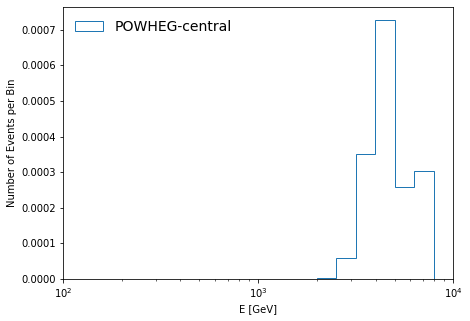

In [11]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
plt.savefig("E_distribution_"+modelname+".pdf")
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [12]:
masses=[round(x,5) for x in np.logspace(-2,0.2,22+1)]
couplings = np.logspace(-8,-3,101) 

for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.01585.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.01585.npy
sav

save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.05012.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.05012.npy
save data to fil

save data to file: ./model/LLP_spectra/13.6TeV_130_Pythia8-Forward_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.12589.npy
save data to file: ./m

save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8-Max_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8-Max_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_EPOSLHC_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_SIBYLL_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_QGSJET_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_Pythia8-Forward_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.31623.npy
save data to file: ./model/LL

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_NLO-P8-Min_m_1.0.npy
sa

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

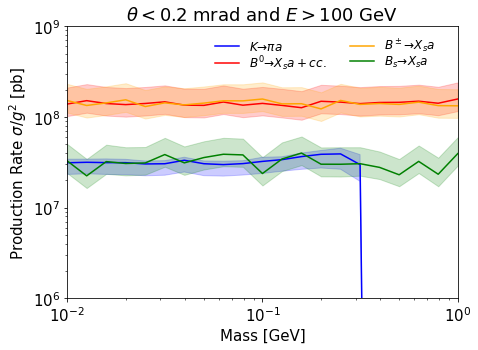

In [13]:
productions=[
     {"channels": ["130","321","-321"], "color": "blue"   , "label": r"$K \to \pi a$"            , "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},
     {"channels": ["511","-511"]      , "color": "red"    , "label": r"$B^0   \to X_s a + cc.$"  , "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
     {"channels": ["521","-521"]      , "color": "orange" , "label": r"$B^\pm \to X_s a$"        , "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},    
     {"channels": ["531","-531"]      , "color": "green"  , "label": r"$B_s   \to X_s a$"        , "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.01,1],ylims=[1e6,1e9],
    xlabel=r"Mass [GeV]",
    ylabel=r"Production Rate $\sigma/g^2$ [pb]",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=2,
)
plot.savefig("Production_"+modelname+".pdf")

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER configuration, which we set up before.

In [14]:
#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,nsample=10)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='default'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [8]:
setups = [ 
    ["13.6TeV_default_POWHEG-central.npy", "POWHEG (central)", "red"     ,  "solid"  , 0., 3],
    ["13.6TeV_default_POWHEG-max.npy"    , "POWHEG (max)"    , "magenta" ,  "solid"  , 0., 3],
    ["13.6TeV_default_POWHEG-min.npy"    , "POWHEG (min)"    , "orange"  ,  "solid"  , 0., 3],
]

Then we specify all the existing bounds, separating the bounds obtained by experimental collaboratios and theory recasts. 

In [71]:
bounds = [   
    ["bounds_BaBar.txt",       "BaBar",    0.30, 9.0e-5, 0       ],
    ["bounds_SN1987.txt",      "SN1987",  0.065, 9.0e-7, 0       ],
    ["bounds_E137.txt",        "E137",    0.100, 1.2*10**-6, -8  ],
    ["bounds_LEP.txt",         "LEP",     0.650, 6.7*10**-4, 0   ],
    ["bounds_E949_displ.txt",  "E949",    0.065, 9.0*10**-5, -9  ],
    ["bounds_NA62_1.txt",      "NA62",    0.245, 4.5*10**-4, 90  ],
    ["bounds_NA62_2.txt",      "NA62",    0.065, 9.2*10**-6, 2   ],
    ["bounds_KOTO.txt",        "KOTO",    0.090, 3.4*10**-5, 2   ],
    ["bounds_KTEV.txt",        "KTEV",    0.200, 4.5*10**-4, 90  ],
    ["bounds_NA6264.txt",      "+ NA48/2",0.270, 2.5*10**-4, 90  ],
    ["bounds_E949_prompt.txt", "E949",    0.065, 3.0*10**-6, -5  ],
    ["bounds_CDF.txt",         "CDF",     0.065, 6.5*10**-4, -12 ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [10]:
projections = [
    ["limits_Belle2-3gamma.txt",   "royalblue",   r"Belle2 $3\gamma$"+ "\n" +r"50ab$^{-1}$"  , 0.450, 2.1e-4, 0  ],
    ["limits_KOTO-2gamma.txt",     "cyan",        r"KOTO $2\gamma$"    , 0.090, 2.4e-4, 0  ],
    ["limits_KOTO-4gamma.txt",     "blue",        r"KOTO $4\gamma$"    , 0.115, 3.2e-4, 0  ],
    ["limits_NA62-0gamma1.txt",    "dodgerblue",  r"NA62 $0\gamma$"    , 0.220, 2.25e-5, 0  ],
    ["limits_NA62-0gamma2.txt",    "dodgerblue",  None                 , 0    , 0     , 0  ],
    ["limits_LHC.txt",             "teal",        r"LHC $Z\to3\gamma$" , 0.650, 5e-6  , 0  ],
]


We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

In [11]:
branchings = [
    ["gamma_gamma", "black", "solid", r"$\gamma\gamma$", 0.1, 0.3 ],
    ["e_e_gamma"  , "blue" , "solid", r"$ee\gamma$"    , 0.1, 0.02],
]

Finally, we can plot everything using `foresee.plot_reach()`. Here we also add the dark matter relict target line obtained in [2105.07077](https://arxiv.org/abs/2105.07077).

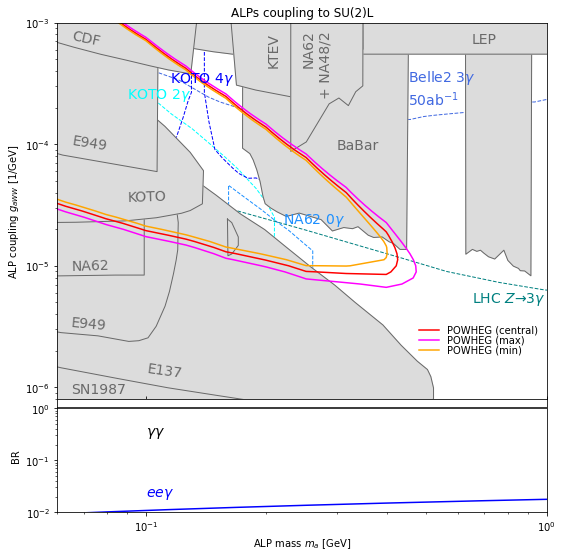

In [12]:
plot, ax1, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    branchings=branchings,
    title="ALPs coupling to SU(2)L", 
    xlims = [0.06,1], 
    ylims=[8e-7,0.001],    
    xlabel=r"ALP mass $m_{a}$ [GeV]", 
    ylabel=r"ALP coupling $g_{aWW}$ [1/GeV]",
    legendloc=(1,0.22),
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
# plot.savefig("Reach_"+modelname+".pdf")
plot.show()

## Event Rate / Efficiency / Acceptance Plot 

In [13]:
masses=[round(x,5) for x in np.logspace(-2,0.2,22+1)]
couplings = np.logspace(-8,-3,101) 

In [13]:
#get reach  - no cuts

#specify setup
setup, selection, channels  = "FASER_wo_cut", "np.sqrt(x.x**2 + (x.y+0.065)**2)< 0.1", None
length, luminosity, distance = 4.0, 57.7, 474
foresee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity, length=length)


list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,nsample=10)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",result)

In [14]:
#get reach  - with cuts

#specify setup
setup, selection, channels  = "FASER", "np.sqrt(x.x**2 + (x.y+0.065)**2)< 0.1 and p.mag>1500", None
length, luminosity, distance = 4.0, 57.7, 474
foresee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity, length=length)


list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,nsample=10)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",result)

In [20]:
foresee.extract_contours(
    inputfile="model/results/13.6TeV_FASER_POWHEG-central.npy", 
    outputfile="model/lines/limits_FASER_POWHEG-central.txt", 
    nevents=3
)

- prepare efficiency

In [21]:
masses,couplings,nsignals1=np.load("model/results/13.6TeV_FASER_POWHEG-central.npy", allow_pickle=True, encoding='latin1')
masses,couplings,nsignals0=np.load("model/results/13.6TeV_FASER_wo_cut_POWHEG-central.npy", allow_pickle=True, encoding='latin1')
efficiencies=[]
for line1, line0 in zip(nsignals1, nsignals0):
    line=[]
    for n1,n0 in zip(line1, line0): 
        if n0==0 or n1<1e-10: line.append(np.nan)
        else: line.append(n1/n0)
    efficiencies.append(line)
np.save(model.modelpath+"model/results/efficiencies.npy",[masses,couplings,efficiencies])


- prepare total number of events

In [22]:
masses,couplings,nsignals0=np.load("model/results/13.6TeV_FASER_wo_cut_POWHEG-central.npy", allow_pickle=True, encoding='latin1')

lumi,channels = 57.7, ["511","-511","521","-521"]
nalls = []
for mass in masses: 
    line = []
    for coupling in couplings: 
        nall=0
        for channel in channels:
            # if channel=="111" and mass>0.135: continue
            data = np.load("model/LLP_spectra/13.6TeV_"+channel+"_NLO-P8_m_"+str(mass)+".npy")
            nall +=sum(data[2])*lumi*1000*coupling**2
        line.append(nall)
    nalls.append(line)

acceptance=[]
for line0, lineA in zip(nsignals0, nalls):
    line=[]
    for n0,nA in zip(line0, lineA): 
        if nA==0: line.append(np.nan)
        else: line.append(n0/nA)
    acceptance.append(line)
np.save(model.modelpath+"model/results/acceptance.npy",[masses,couplings,acceptance])
                           

 - plot

In [6]:
bounds = [   
    # ["bounds_BaBar.txt",       "BaBar",    0.30, 9.0e-5, 0       ],
    # ["bounds_SN1987.txt",      "SN1987",  0.065, 9.0e-7, 0       ],
    # ["bounds_E137.txt",        "E137",    0.100, 1.2*10**-6, -8  ],
    # ["bounds_LEP.txt",         "LEP",     0.650, 6.7*10**-4, 0   ],
    # ["bounds_E949_displ.txt",  "E949",    0.065, 9.0*10**-5, -9  ],
    # ["bounds_NA62_1.txt",      "NA62",    0.245, 4.5*10**-4, 90  ],
    # ["bounds_NA62_2.txt",      "NA62",    0.065, 9.2*10**-6, 2   ],
    # ["bounds_KOTO.txt",        "KOTO",    0.090, 3.4*10**-5, 2   ],
    # ["bounds_KTEV.txt",        "KTEV",    0.200, 4.5*10**-4, 90  ],
    # ["bounds_NA6264.txt",      "+ NA48/2",0.270, 2.5*10**-4, 90  ],
    # ["bounds_E949_prompt.txt", "E949",    0.065, 3.0*10**-6, -5  ],
    # ["bounds_CDF.txt",         "CDF",     0.065, 6.5*10**-4, -12 ],
    ["bounds_all.txt",       "all",    0.30, 9.0e-5, 0       ]
]

In [16]:
import matplotlib
from matplotlib import pyplot as plt

def plot_density(
    filename, efficiency=1, bounds=bounds, title=None,
    xlabel=r"ALP Mass $m_{a}$ [GeV]", ylabel=r"ALP coupling $g_{a}$ [1/GeV]",
    xlims=[6e-2,1],ylims=[8**-7,10**-3], figsize=(7,5),
    do_log=True, vmin=1e-4, vmax=1e4, show_contour=True,
):

    # ticks
    ticks = np.array([[np.linspace(10**(j),10**(j+1),9)] for j in range(-7,6)]).flatten()
    ticks = [np.log10(x) for x in ticks]
    ticklabels = np.array([[r"$10^{"+str(j)+"}$","","","","","","","",""] for j in range(-7,6)]).flatten()
        
    # initiate figure
    matplotlib.rcParams.update({'font.size': 15})
    fig, ax = plt.subplots(figsize=figsize)

    # print (bounds)
    
    # Existing Constraints
    zorder=2
    for bound in bounds:
        filenameb, label, posx, posy, rotation = bound
        # print (filenameb)
        data=foresee.readfile("model/lines/"+filenameb)
        ax.fill(np.log10(data.T[0]), np.log10(data.T[1]), color="gainsboro",zorder=zorder, alpha=0.6)
        ax.plot(np.log10(data.T[0]), np.log10(data.T[1]), color="dimgray"  ,zorder=zorder,lw=1)
        # if label is not None: ax.text(posx, posy, label, fontsize=fs_label, color="dimgray", rotation=rotation)
        zorder = zorder + 1
    
    # # FASER sensitivity
    # if show_contour:
    #     data = foresee.readfile("model/lines/limits_FASER_POWHEG-central.txt")
    #     ax.plot(np.log10(data.T[0]), np.log10(data.T[1]), color="k", lw=2, ls="solid", zorder=50)
    #     ax.text(np.log10(0.3), np.log10(9.0e-6), " N=3",  fontsize=15,color="k",rotation=0)  
    #     ax.text(np.log10(0.45),np.log10(1.25e-4)," L=57.7 fb$^{-1}$", fontsize=14  )

    #     ax.text(np.log10(8e-2),np.log10(2.4e-6),"Simulation", fontsize=14 , fontweight='bold')

    
    # forward experiment sensitivity
    masses,couplings,nsignals=np.load(filename, allow_pickle=True, encoding='latin1')
    masses,couplings = np.meshgrid(masses, couplings)
    nsignals = np.array(nsignals).T.flatten()
    masses, couplings = np.log10(masses.flatten())+0.01, np.log10(couplings.flatten())+0.01
    if do_log:
        h=ax.hist2d (x=masses,y=couplings,weights=nsignals*efficiency,
            bins=[np.linspace(-2,0.2,23),np.linspace(-8.,-3,51)],range=[[-2,0.2],[-8,-3]],
            norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax), cmap="YlGnBu")
    else: 
        h=ax.hist2d (x=masses,y=couplings,weights=nsignals*efficiency,
            bins=[np.linspace(-2,0.2,23),np.linspace(-8.,-3,51)],range=[[-2,-0.2],[-8,-3]],
            norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax), cmap="YlGnBu")
    fig.colorbar(h[3], ax=ax)
    
    #frame
    if title is not None: ax.set_title(title) 
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xlim(np.log10(6e-2),np.log10(1e0))
    ax.set_ylim(np.log10(8e-7), -3)
    
    #add logo
    # im = plt.imread('/Users/abraham/Documents/GitHub/FaserLogo.png') # insert local path of the image.
    im = plt.imread('/Users/abraham/Documents/GitHub/FaserLogo_transparent_background.png') # insert local path of the image.
    
    newax = fig.add_axes([0.6,0.67,0.20,0.20], anchor='NE', zorder=100)
    # newax = fig.add_axes([0.2,0.2,0.20,0.20], anchor='NE', zorder=100)
    # newax.imshow(X=im,interpolation='none', cmap='gray',alpha=1-np.array(im))
    newax.imshow(X=im,interpolation='none', cmap='gray',alpha=1)
    newax.axis('off')
    ax.text(np.log10(4.5e-1),np.log10(2e-4),"Simulation", fontsize=14 , fontweight='bold')
    # ax.text(np.log10(8e-2),np.log10(2.4e-6),"Simulation", fontsize=14 , fontweight='bold')

    # FASER sensitivity
    if show_contour:
        data = foresee.readfile("model/lines/limits_FASER_POWHEG-central.txt")
        ax.plot(np.log10(data.T[0]), np.log10(data.T[1]), color="k", lw=2, ls="solid", zorder=50)
        ax.text(np.log10(0.3), np.log10(9.0e-6), " N=3",  fontsize=15,color="k",rotation=0)  
        ax.text(np.log10(8e-2),np.log10(1.5e-6)," L=57.7 fb$^{-1}$", fontsize=14  )


    fig.tight_layout()
    # matplotlib.rcParams.update({'font.size': 24})
    # plt.rcParams.update({'font.size': 24})
    plt.subplots_adjust(left=0.15, right=0.98, bottom=0.150, top=0.9)
    ax.set_aspect('auto')    

    return plt

/var/folders/jz/7_hghn6x3zz3hlx7q87ky4080000gn/T/ipykernel_86960/1452972689.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


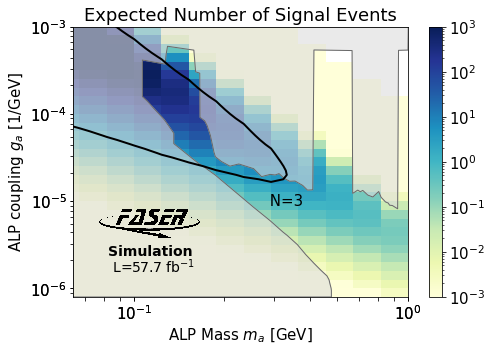

In [9]:
plot=plot_density(
    filename="model/results/13.6TeV_FASER_POWHEG-central.npy", 
    bounds=bounds,
    title="Expected Number of Signal Events",
    efficiency=0.75, vmin=1e-3, vmax=1e3, show_contour=True, 
)
# plot.savefig("Nevents.pdf")
plt.savefig('Nevents_transparent_logo.pdf', transparent=True)

/var/folders/jz/7_hghn6x3zz3hlx7q87ky4080000gn/T/ipykernel_86960/4040836113.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


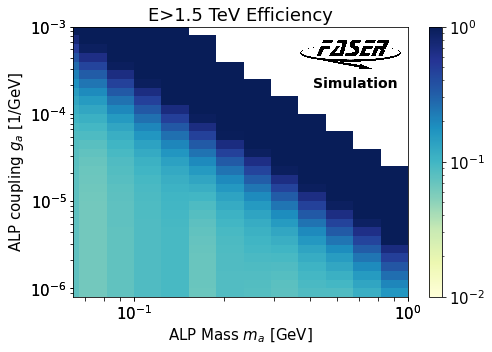

In [17]:
plot_density(
    filename="model/results/efficiencies.npy", 
    title="E>1.5 TeV Efficiency", 
    bounds=[],
    efficiency=1,
    do_log=True, vmin=1e-2, vmax=1e0, show_contour=False, 
)
plot.savefig("Efficiency_transparent_logo.pdf")

/var/folders/jz/7_hghn6x3zz3hlx7q87ky4080000gn/T/ipykernel_86960/4040836113.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


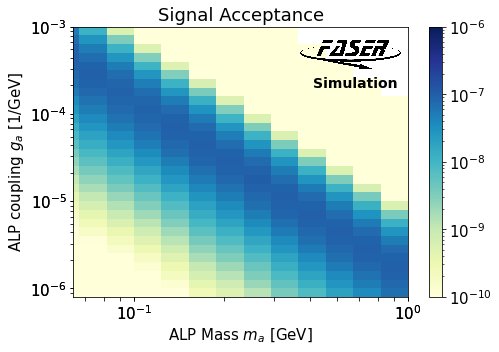

In [18]:
plot_density(
    filename="model/results/acceptance.npy", 
    title="Signal Acceptance", 
    bounds=[],
    efficiency=0.5, # for forward/backward
    vmin=1e-10, vmax=1e-6,show_contour=False, 
)
plot.savefig("acceptance_transparent_logo.pdf")

# Junk

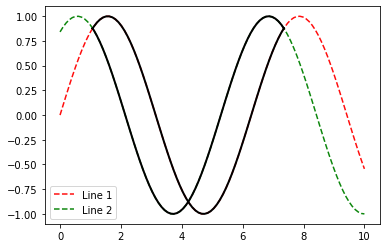

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Polygon
from shapely.ops import unary_union, polygonize

# Sample data (you can replace this with your own lines)
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.sin(x + 1)
# y3 = np.sin(x + 2)

fig, ax = plt.subplots()

# Add the original lines for reference (optional)
ax.plot(x, y1, 'r--', label='Line 1', alpha=0.95)
ax.plot(x, y2, 'g--', label='Line 2', alpha=0.95)
# ax.plot(x, y3, 'b--', label='Line 3', alpha=0.95)

# Create the lines (as LineStrings)
lines = [
    LineString(np.column_stack([x, y1])),
    LineString(np.column_stack([x, y2])),
    # LineString(np.column_stack([x, y3]))
]

# Combine all lines into a single MultiLineString and then take the union
multi_line = MultiLineString(lines)
merged_lines = unary_union(multi_line)

# Polygonize the lines to extract boundaries (this step turns lines into polygons)
boundary_polygons = polygonize(merged_lines)

# Plot the boundaries
for polygon in boundary_polygons:
    boundary = polygon.exterior
    x, y = boundary.xy
    ax.plot(x, y, 'k-', lw=2)


plt.legend()
plt.show()


In [12]:
from PIL import Image

# Load the logo image
logo_path = '/Users/abraham/Documents/GitHub/FaserLogo.png'
logo = Image.open(logo_path)

# Convert the image to RGBA (if it's not already in that format)
logo = logo.convert("RGBA")

# Get the data of the image
data = logo.getdata()

# Replace white background with transparent
new_data = []
for item in data:
    # Change all white (also shades of white)
    # to transparent by checking if red, green, and blue are all 255
    if item[0] > 200 and item[1] > 200 and item[2] > 200:
        new_data.append((255, 255, 255, 0))  # Set transparency (alpha=0)
    else:
        new_data.append(item)

# Update image data with transparency
logo.putdata(new_data)

# Save the new image
logo.save("/Users/abraham/Documents/GitHub/FaserLogo_transparent_background.png", "PNG")
